In [1]:
import pandas as pd
df = pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [2]:
df.columns

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split

cols=['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare']
X = df[cols]
y = df['Survived']

In [4]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [5]:
X = X_samp[cols]
y = y_samp['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1000.0, random_state=0)
model

LogisticRegression(C=1000.0, random_state=0)

In [9]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [12]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7641681901279708
0.8029197080291971


In [10]:
print("오분류 샘플 개수 : %d" % (y_test != pred).sum())

오분류 샘플 개수 : 27


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# 정확도. model.score()와 같은 값
print("Accuracy : %.2f" % accuracy_score(y_test, pred))
# 
print("Precision : %.3f" % precision_score(y_test, pred))
print("Recall : %.3f" % recall_score(y_test, pred))
print("F1 : %.3f" % f1_score(y_test, pred))

Accuracy : 0.80
Precision : 0.806
Recall : 0.794
F1 : 0.800


In [13]:
from sklearn.metrics import confusion_matrix

y = [1, 0, 1, 1, 0, 1]
pred = [0, 0, 1, 1, 0, 1]
cm = confusion_matrix(y, pred)
print(cm)

[[2 0]
 [1 3]]


In [14]:
tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
print(tn, fp, fn, tp)

2 0 1 3


In [15]:
# 모델이 true라고 분류한 것 중에 실제 true의 비율
# 모델이 2개가 1이라고 분류했으나 실제로는 1개라서 0.5가 나옴
# 모형이 제대로 분류했는지 평가

y = [0, 1, 0, 0]
pred = [0, 1, 1, 0]
ps = precision_score(y, pred)
print(ps)

0.5


In [16]:
# 모형이 아니라 실제 값을 봄
# 실제 값에서는 1이 2개인데 모형에서는 1이 1개뿐이라서 0.5가 나옴

import numpy as np

y = np.array([0, 1, 1, 0])
pred = np.array([0, 1, 0, 0])
recall_score(y, pred)

0.5

In [17]:
from sklearn.metrics import classification_report

y = np.array([0, 1, 1, 1])
pred = np.array([0, 1, 0, 0])
print(classification_report(y, pred))

# precision과 recall은 반비례 관계
# f1-score는 precision과 recall의 조화
# support는 실제 개수
# macro는 클래스를 동일한 비중으로 고려함(1도 3개, 0도 3개 이런 식으로)
# weighted는 f1-score와 동일

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

costs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []

for c in costs:
    params = {'C':c, 'max_iter':1000} # max_iter는 최대반복회수
    clf = LogisticRegression(**params).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results.append(score)

print(results)

[0.6496350364963503, 0.781021897810219, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971]


최고 정확도 :  0.8029197080291971
최적의 C :  0.1


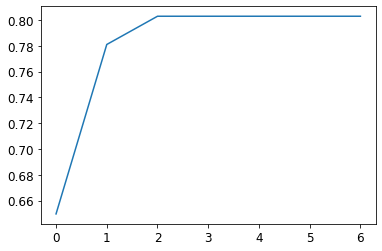

In [19]:
%matplotlib inline

m = max(results)
for i, a in enumerate(results):
    if a == m:
        n = i
        break
print("최고 정확도 : ", m)
print("최적의 C : ", costs[n])

plt.rcParams["font.size"]=12
plt.plot(range(len(costs)), results)
plt.show()

In [ ]:
# 로지스틱 회귀 모형의 class-weight

In [24]:
df = pd.read_csv("c:/data/iris/iris_n.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [25]:
df2 = df.drop(df.index[range(40)])

In [26]:
df2.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [27]:
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df2[cols]
y = df2['Species']

In [28]:
# 불균형 데이터셋임을 확인

df2.Species.value_counts()

1    50
2    50
0    10
Name: Species, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


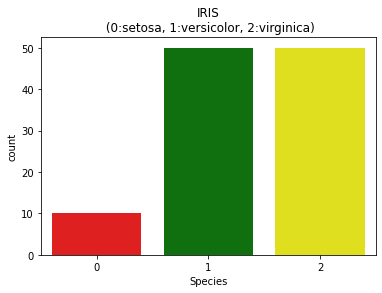

In [29]:
%matplotlib inline
import seaborn as sns

colors = ["red", "green", "yellow"]

sns.countplot('Species', data=df2, palette=colors)
plt.title('IRIS\n (0:setosa, 1:versicolor, 2:virginica)', fontsize=12)
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

1    40
2    40
0     8
Name: Species, dtype: int64

In [31]:
logit1 = LogisticRegression(random_state=0) # 가중치 없음
logit2 = LogisticRegression(random_state=0, class_weight='balanced') # 샘플수에 반비례해서 가중치 부여
logit3 = LogisticRegression(random_state=0, class_weight={0:3, 1:1, 2:2}) # 가중치 직접 설정

In [32]:
# 가중치 낮추는 식

print(np.bincount(y)) # 샘플수를 구함
print(88 / (3*np.bincount(y)))

[10 50 50]
[2.93333333 0.58666667 0.58666667]


In [33]:
for logit in [logit1, logit2, logit3]:
    logit.fit(X_train, y_train)
    print(logit)
    print("학습용: ", logit.score(X_train, y_train))
    print("검증용: ", logit.score(X_test, y_test))
    print()

LogisticRegression(random_state=0)
학습용:  0.9545454545454546
검증용:  1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용:  0.9545454545454546
검증용:  1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용:  0.9545454545454546
검증용:  1.0



In [36]:
# 로지스틱 회귀모형의 penalty

In [37]:
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

0    40
1    40
2    40
Name: Species, dtype: int64

In [41]:
models = [LogisticRegression(random_state=0, penalty='l1', solver='liblinear'),
LogisticRegression(random_state=0, penalty='l2'), # 기본옵션
LogisticRegression(random_state=0, penalty='elasticnet', solver='saga', l1_ratio=1, max_iter=1000),
LogisticRegression(random_state=0, penalty='none')]

In [42]:
for logit in models:
    print(logit)
    logit.fit(X_train, y_train)

    print("학습용 : ", logit.score(X_train, y_train))
    print("검증용 : ", logit.score(X_test, y_test))
    print()

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
학습용 :  0.9583333333333334
검증용 :  0.9666666666666667

LogisticRegression(random_state=0)
학습용 :  0.9666666666666667
검증용 :  1.0

LogisticRegression(l1_ratio=1, max_iter=1000, penalty='elasticnet',
                   random_state=0, solver='saga')


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습용 :  0.975
검증용 :  1.0

LogisticRegression(penalty='none', random_state=0)
학습용 :  0.9833333333333333
검증용 :  1.0



C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
